# Introduction

For this project, I acted as a data researcher for the fictional World Health Organization. I investigated if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.  

During this project, I have analyzed, prepared, and ploted data, and seeked to answer questions in a meaningful way.

**Focusing Questions**: 
+ Has life expectancy increased over time in the seven nations?
+ What is the average life expactancy in these nations?
+ What is the distribution of that life expectancy?
+ Has GDP increased over time in the seven nations?
+ What is average GDP in these nations?
+ Is there a correlation between GDP and life expectancy of a country?


## Import Python Modules

Importing the modules that will be used in this project.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import statsmodels.api as sm

## Examine / Prep The Data

To look for connections between GDP and life expectancy the datasets are loaded into DataFrames so that they can be visualized.

 **gdp_lifexpectancy.csv** is loaded into a DataFrame called `data_pd`. Then, quickly inspected the DataFrame using `.head()` and `.info()`.

In [4]:
data_pd = pd.read_csv('all_data.csv')
data_pd.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Tweak The DataFrame

The first two column names are one word each, and the third is five words long. `Life expectancy at birth (years)` is descriptive, which will be good for labeling the axis, but a little difficult to wrangle for coding the plot itself.
Using Pandas to change the name of the last column to `LifeExp`.

In [6]:
data_pd.rename(columns = {'Life expectancy at birth (years)':'LifeExp'}, inplace=True)
data_pd.head()

,Country,Year,LifeExp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Question: Has life expectancy increased over time in the six nations?

On the bar chart below, we can see that the average life expectancy over all six nations, had a steady growth in 15 years (2000-2015).
<br>Outliers range has been decreasing over the years also, leading to the decreased variation of values.

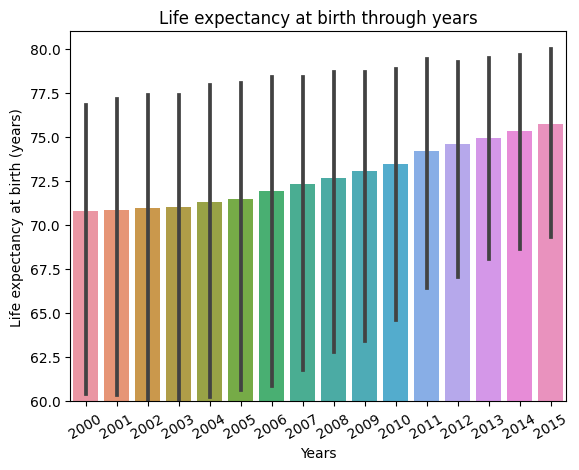

<Figure size 640x480 with 0 Axes>

In [64]:
# ax1 = plt.subplot()
# plt.bar(data_pd.Year, data_pd.LifeExp)
sb.barplot(x='Year', y='LifeExp', data=data_pd)
# ax1.set_xticks(data_pd.Year.unique())
plt.xticks(rotation=30)
plt.title('Life expectancy at birth through years')
plt.xlabel('Years')
plt.ylabel('Life expectancy at birth (years)')
plt.ylim((60, 81))
plt.show()
plt.clf()

In [8]:
max_life_exp = round(data_pd.LifeExp[data_pd.Year == 2015].mean(), 2)
min_life_exp = round(data_pd.LifeExp[data_pd.Year == 2000].mean(), 2)

life_exp_growth = round((max_life_exp - min_life_exp), 2)
print('From year 2000 to year 2015, the average life expectancy at birth grew by ' + str(life_exp_growth) + ' years.')
print('From ' + str(min_life_exp) + ' to ' + str(max_life_exp) + ' average life expectancy years.')

From year 2000 to year 2015, the average life expectancy at birth grew by 4.95 years.
From 70.77 to 75.72 average life expectancy years.


## Life Expectancy By Country

Average life expectancy for each country.

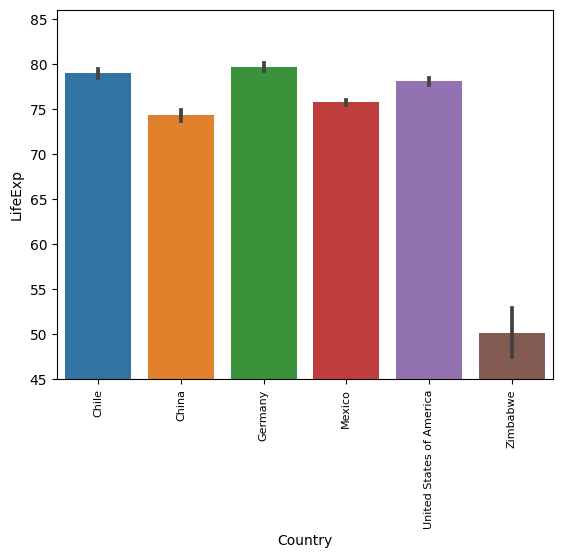

<Figure size 640x480 with 0 Axes>

In [37]:
sb.barplot(x='Country', y='LifeExp', data=data_pd)
sb.color_palette('colorblind')
plt.xticks(rotation = 90, fontsize = 8)
plt.ylim((45, 86))
plt.show()
plt.clf()

## Question: What is the average life expactancy in these nations?

In [95]:
avg_usa = round(data_pd.LifeExp[data_pd.Country == 'United States of America'].mean(),1)
avg_chi = round(data_pd.LifeExp[data_pd.Country == 'China'].mean(),1)
avg_ger = round(data_pd.LifeExp[data_pd.Country == 'Germany'].mean(),1)
avg_mex = round(data_pd.LifeExp[data_pd.Country == 'Mexico'].mean(),1)
avg_chl = round(data_pd.LifeExp[data_pd.Country == 'Chile'].mean(),1)
avg_zim = round(data_pd.LifeExp[data_pd.Country == 'Zimbabwe'].mean(),1)

cnt_list = [avg_usa, avg_chi, avg_ger, avg_mex, avg_chl, avg_zim]
name_list = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']

print("Average life expectancy in years: ")
for country, name in zip(cnt_list, name_list):
    print(name + ": " + str(country))

Average life expectancy in years: 
United States of America: 78.1
China: 74.3
Germany: 79.7
Mexico: 75.7
Chile: 78.9
Zimbabwe: 50.1


## Question: What is the distribution of that life expectancy?

## Life Expectancy For Each Country (By Years)

On the bar charts below where life expectancy data is ploted against each year, it can be seen that each country (except Zimbabwe) had a slow and steady growth, with minor oscillations, through 15 years. 

Zimbabwe showed a more significant increase each year, beginning at year 2004. Which resulted in Zimbabwe having the greatest increase overall.

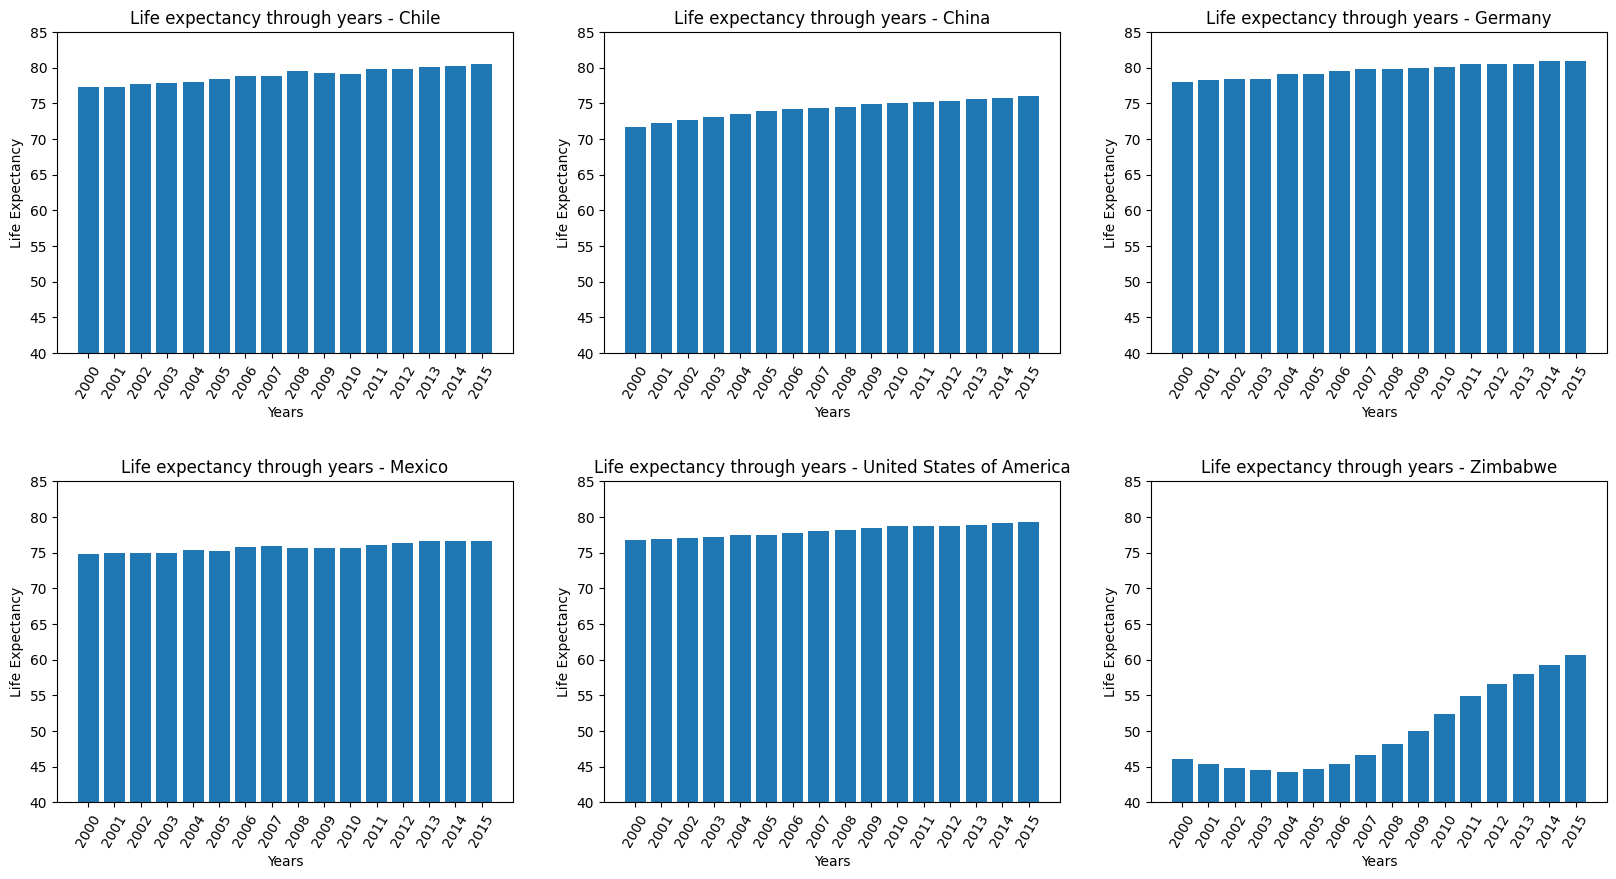

<Figure size 640x480 with 0 Axes>

In [18]:
countries = data_pd.Country.unique()
x = 1

fig = plt.figure(figsize=(20, 10))

for country in countries:
    ax2 = plt.subplot(2, 3, x)
    plt.bar(data_pd.Year[data_pd.Country == country], data_pd.LifeExp[data_pd.Country == country])
    ax2.set_xticks(data_pd.Year.unique())
    sb.color_palette("dark:salmon_r", as_cmap=True)
    plt.xticks(rotation=60, fontsize=10)
    plt.xlabel('Years')
    plt.ylabel('Life Expectancy')
    plt.title('Life expectancy through years - ' + country)
    plt.ylim((40, 85))
    x+=1

plt.subplots_adjust(hspace=0.4)
plt.show()
plt.clf()


## Question: Has GDP increased over time in the six nations?

GDP average value for all six nations (combined) showed a significant growth over time.
<br> Gross Domestic Product for the last year (2015) of the dataset has a more than double average value compared to the first year (2000) of the dataset.


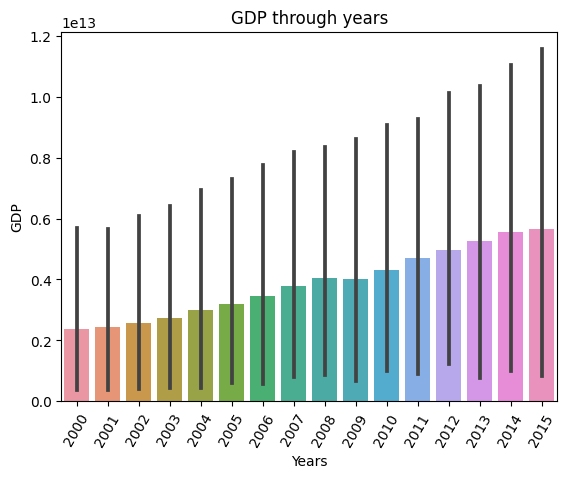

<Figure size 640x480 with 0 Axes>

In [65]:
# ax3 = plt.subplot()
sb.barplot(x='Year', y='GDP', data=data_pd)
# plt.bar(data_pd.Year, data_pd.GDP)
# ax3.set_xticks(data_pd.Year.unique())
plt.xticks(rotation=60)
plt.title('GDP through years')
plt.xlabel('Years')
plt.ylabel('GDP')
# plt.ylim((0.75, 1.80))
plt.show()
plt.clf()

In [56]:
max_gdp = round(data_pd.GDP[data_pd.Year == 2015].mean())
min_gdp = round(data_pd.GDP[data_pd.Year == 2000].mean())
min_trillion = round((min_gdp/1000000000000),1)
max_trillion = round((max_gdp/1000000000000),1)

gdp_growth = round((max_gdp - min_gdp))
gdp_growth_trillion = round((gdp_growth/1000000000000),1)
print('From year 2000 to year 2015, the average GDP (Gross Domestic Product) grew by $' + str(gdp_growth_trillion) + 'T.')
print('From $' + str(min_trillion) + 'T average, to $' + str(max_trillion) + 'T average gross domestic product value.')

From year 2000 to year 2015, the average GDP (Gross Domestic Product) grew by $3.3T.
From $2.4T average, to $5.7T average gross domestic product value.


## GDP For Each Country (By Years)

Country ranking by GDP value (highest to lowest), based on the plot below:

<br>1. United States of America
<br>2. China
<br>3. Germany
<br>4. Mexico
<br>5. Chile
<br>6. Zimbabwe 

USA has the highest GDP value with steady growth over the years, while China showed the most significan and rapid growth in comparison to the other countries.

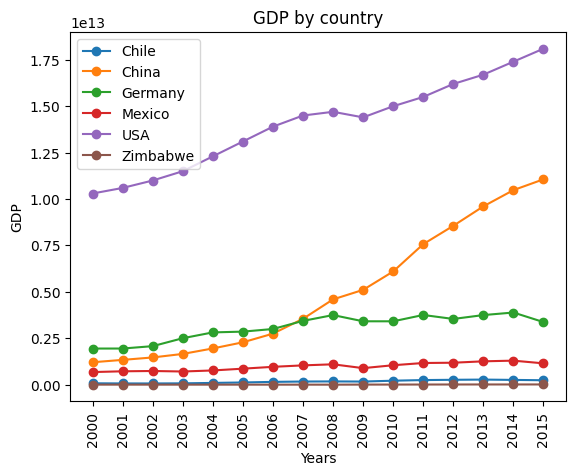

<Figure size 640x480 with 0 Axes>

In [75]:
ax = plt.subplot()
plt.plot(data_pd.Year[data_pd.Country == 'Chile'], data_pd.GDP[data_pd.Country == 'Chile'], marker = 'o', label='Chile')
plt.plot(data_pd.Year[data_pd.Country == 'China'], data_pd.GDP[data_pd.Country == 'China'], marker = 'o', label='China')
plt.plot(data_pd.Year[data_pd.Country == 'Germany'], data_pd.GDP[data_pd.Country == 'Germany'], marker = 'o', label='Germany')
plt.plot(data_pd.Year[data_pd.Country == 'Mexico'], data_pd.GDP[data_pd.Country == 'Mexico'], marker = 'o', label='Mexico')
plt.plot(data_pd.Year[data_pd.Country == 'United States of America'], data_pd.GDP[data_pd.Country == 'United States of America'], marker = 'o', label='USA')
plt.plot(data_pd.Year[data_pd.Country == 'Zimbabwe'], data_pd.GDP[data_pd.Country == 'Zimbabwe'], marker = 'o', label='Zimbabwe')
ax.set_xticks(data_pd.Year.unique())
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Years')
plt.ylabel('GDP')
plt.title('GDP by country')
plt.show()
plt.clf()


## Question: What is average GDP in these nations?

In [14]:
avg_usa = round((data_pd.GDP[data_pd.Country == 'United States of America'].mean())/1000000000000,2)
avg_chi = round((data_pd.GDP[data_pd.Country == 'China'].mean())/1000000000000,2)
avg_ger = round((data_pd.GDP[data_pd.Country == 'Germany'].mean())/1000000000000,2)
avg_mex = round((data_pd.GDP[data_pd.Country == 'Mexico'].mean())/1000000000000,2)
avg_chl = round((data_pd.GDP[data_pd.Country == 'Chile'].mean())/1000000000000,2)
avg_zim = round((data_pd.GDP[data_pd.Country == 'Zimbabwe'].mean())/1000000000000,2)

cnt_list = [avg_usa, avg_chi, avg_ger, avg_mex, avg_chl, avg_zim]
name_list = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']

print("Average GDP over time for each country (in trillions of dollars): ")
for country, name in zip(cnt_list, name_list):
    print(name + ": " + "$" + str(country) + "T")

Average GDP over time for each country (in trillions of dollars): 
United States of America: $14.08T
China: $4.96T
Germany: $3.09T
Mexico: $0.98T
Chile: $0.17T
Zimbabwe: $0.01T


## Question: Is there a correlation between GDP and life expectancy of a country?

A positive linear correlation between GDP and Life Expectancy can be observed for every country on the scatter plot graphs down below. 
<br> Which leads to conclusion that the higher GDP leads to the higher Life Excpectancy inside a country.

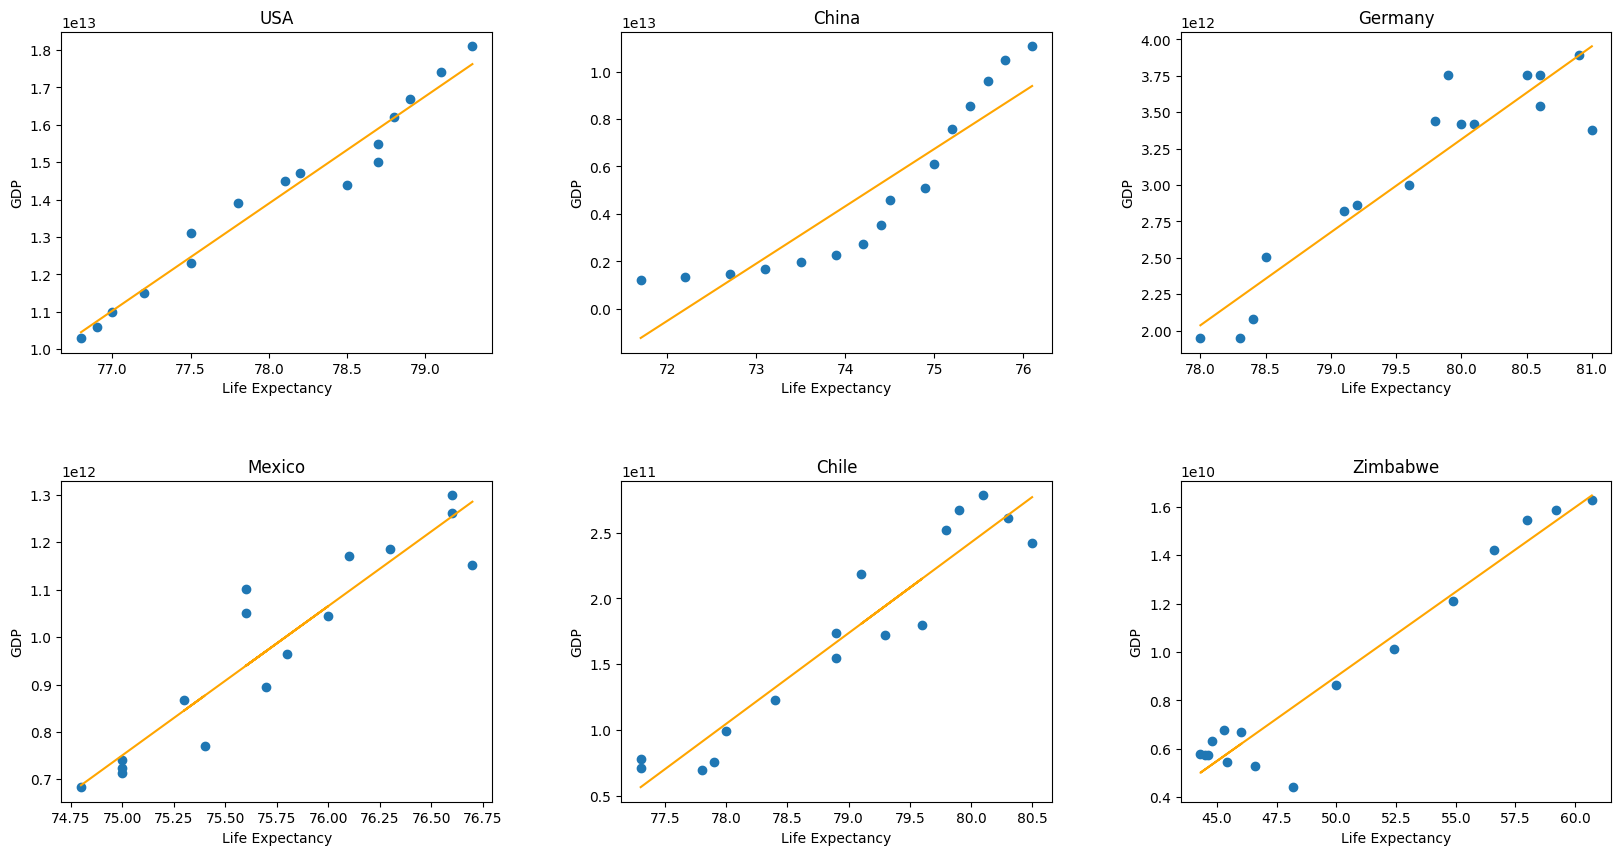

In [93]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'United States of America'], data_pd.GDP[data_pd.Country == 'United States of America'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='United States of America']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='United States of America'], model.predict(data_pd[data_pd.Country=='United States of America']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('USA')

plt.subplot(2, 3, 2)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'China'], data_pd.GDP[data_pd.Country == 'China'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='China']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='China'], model.predict(data_pd[data_pd.Country=='China']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('China')

plt.subplot(2, 3, 3)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'Germany'], data_pd.GDP[data_pd.Country == 'Germany'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='Germany']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='Germany'], model.predict(data_pd[data_pd.Country=='Germany']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Germany')

plt.subplot(2, 3, 4)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'Mexico'], data_pd.GDP[data_pd.Country == 'Mexico'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='Mexico']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='Mexico'], model.predict(data_pd[data_pd.Country=='Mexico']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Mexico')

plt.subplot(2, 3, 5)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'Chile'], data_pd.GDP[data_pd.Country == 'Chile'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='Chile']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='Chile'], model.predict(data_pd[data_pd.Country=='Chile']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Chile')

plt.subplot(2, 3, 6)
plt.scatter(data_pd.LifeExp[data_pd.Country == 'Zimbabwe'], data_pd.GDP[data_pd.Country == 'Zimbabwe'])
model = sm.OLS.from_formula('GDP ~ LifeExp', data_pd[data_pd.Country=='Zimbabwe']).fit()
plt.plot(data_pd.LifeExp[data_pd.Country=='Zimbabwe'], model.predict(data_pd[data_pd.Country=='Zimbabwe']), color='orange')
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Zimbabwe')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()